In [55]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import yfinance as yf
from pandas_datareader import data as pdr

from ta.volatility import BollingerBands
import pickle
from create_prev_close_func import create_prev_close_df


### 1. Get the start date and end date to capture enough data for bband calculation

In [56]:
days_sub2 = datetime.timedelta(40)
days_sub1 = datetime.timedelta(1)
start_date = datetime.date.today() - days_sub2
end_date = datetime.date.today()-days_sub1
# end_date = datetime.date.today()

In [57]:
datetime.date.today()+datetime.timedelta(1)

datetime.date(2022, 5, 3)

### 2. Get the stock data to use the model for prediction

In [58]:
tick = 'AAPL'

yf.pdr_override()

df_raw = pdr.get_data_yahoo(tick, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [59]:
df_raw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700
2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90131400
2022-03-25,173.880005,175.279999,172.750000,174.720001,174.720001,80546200
2022-03-28,172.169998,175.729996,172.000000,175.600006,175.600006,90371900
2022-03-29,176.690002,179.009995,176.339996,178.960007,178.960007,100589400
2022-03-30,178.550003,179.610001,176.699997,177.770004,177.770004,92633200
2022-03-31,177.839996,178.029999,174.399994,174.610001,174.610001,103049300
2022-04-01,174.029999,174.880005,171.940002,174.309998,174.309998,78699800


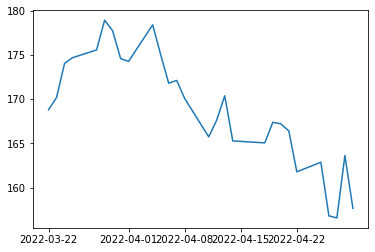

In [60]:
plt.plot(df_raw['Adj Close'])

In [61]:
df = df_raw.filter(['Adj Close'])
df

,Adj Close
Date,
2022-03-22,168.820007
2022-03-23,170.210007
2022-03-24,174.070007
2022-03-25,174.720001
2022-03-28,175.600006
2022-03-29,178.960007
2022-03-30,177.770004
2022-03-31,174.610001
2022-04-01,174.309998


### 3. Processing the data to form the required features to be used by the model

In [62]:
df_main = create_prev_close_df(df, "Adj Close")
df_main

,D_m3,D_m2,D_m1,Adj Close
Date,,,,
2022-03-22,NaN,NaN,NaN,168.820007
2022-03-23,NaN,NaN,168.820007,170.210007
2022-03-24,NaN,168.820007,170.210007,174.070007
2022-03-25,168.820007,170.210007,174.070007,174.720001
2022-03-28,170.210007,174.070007,174.720001,175.600006
2022-03-29,174.070007,174.720001,175.600006,178.960007
2022-03-30,174.720001,175.600006,178.960007,177.770004
2022-03-31,175.600006,178.960007,177.770004,174.610001
2022-04-01,178.960007,177.770004,174.610001,174.309998


In [63]:
#Calc Bollinger Band(Volatility)

bb_data = BollingerBands(df['Adj Close']).bollinger_wband()
df_bb = pd.DataFrame(bb_data)
df_bb

,bbiwband
Date,
2022-03-22,NaN
2022-03-23,NaN
2022-03-24,NaN
2022-03-25,NaN
2022-03-28,NaN
2022-03-29,NaN
2022-03-30,NaN
2022-03-31,NaN
2022-04-01,NaN


In [64]:
#Merging the lag price data with bband data
df_train = df_main.merge(df_bb, how = "left", left_index =  True, right_index=True)
df_train = df_train.dropna()
df_train = df_train.rename(columns = {'bbiwband':'bb'})
df_ft = df_train.reset_index()
df_ft

,Date,D_m3,D_m2,D_m1,Adj Close,bb
0,2022-04-19,170.399994,165.289993,165.070007,167.399994,9.883852
1,2022-04-20,165.289993,165.070007,167.399994,167.229996,10.054557
2,2022-04-21,165.070007,167.399994,167.229996,166.419998,10.409541
3,2022-04-22,167.399994,167.229996,166.419998,161.789993,11.489273
4,2022-04-25,167.229996,166.419998,161.789993,162.880005,12.062967
5,2022-04-26,166.419998,161.789993,162.880005,156.800003,13.658505
6,2022-04-27,161.789993,162.880005,156.800003,156.570007,14.276945
7,2022-04-28,162.880005,156.800003,156.570007,163.639999,13.563856
8,2022-04-29,156.800003,156.570007,163.639999,157.649994,14.025892


### 4. Transform by pct change

In [65]:
#pct change prices and bb
df_ft[['bb', 'D_m3', 'D_m2', 'D_m1','Adj Close']] = df_ft[['bb', 'D_m3', 'D_m2', 'D_m1', 'Adj Close']].pct_change()
df_ft = df_ft.dropna().reset_index(drop=True)
df_ft

,Date,D_m3,D_m2,D_m1,Adj Close,bb
0,2022-04-20,-0.029988,-0.001331,0.014115,-0.001016,0.017271
1,2022-04-21,-0.001331,0.014115,-0.001016,-0.004844,0.035306
2,2022-04-22,0.014115,-0.001016,-0.004844,-0.027821,0.103725
3,2022-04-25,-0.001016,-0.004844,-0.027821,0.006737,0.049933
4,2022-04-26,-0.004844,-0.027821,0.006737,-0.037328,0.132267
5,2022-04-27,-0.027821,0.006737,-0.037328,-0.001467,0.045279
6,2022-04-28,0.006737,-0.037328,-0.001467,0.045155,-0.049947
7,2022-04-29,-0.037328,-0.001467,0.045155,-0.036605,0.034064


### 5. Forming the df for prediction using the last row data of D_m2, D_m1, Adj Close and bb_m1
- isolate the last D_m2, D_m1, Adj Close and bb data as features to predict the next day price
    - D_m2 becomes D_m3
    - D_m1 becomes D_m2
    - Adj Close becomes D_m1
    - bb becomes bb_m1
- this treatment will make it similar to the features used to train the model

In [66]:
df_pred = df_ft.iloc[-1,2:]
df_pred


D_m2        -0.001467
D_m1         0.045155
Adj Close   -0.036605
bb           0.034064
Name: 7, dtype: object

In [67]:
# To adjust series into required shape for LSTM model prediction
df_pred = pd.DataFrame(df_pred)
df_pred = df_pred.T.reset_index(drop=True)
df_pred = df_pred.rename(columns={'D_m2':'D_m3', 'D_m1': 'D_m2','Adj Close':'D_m1', 'bb':'bb_m1'})
df_pred = df_pred[['bb_m1','D_m3', 'D_m2', 'D_m1']]
df_pred = df_pred.astype(float)
df_pred

,bb_m1,D_m3,D_m2,D_m1
0,0.034064,-0.001467,0.045155,-0.036605


In [68]:
# load saved model and predicting the price
with open('model_pkl' , 'rb') as f:
    model = pickle.load(f)

In [69]:
prediction = model.predict(df_pred)
prediction

array([-0.00838446], dtype=float32)

In [70]:
#Retrieving the previous close price for pred price generation
pclose = df.iloc[-1,-1]
pclose 

163.63999938964844

### 6. For Testing - if we have predicted day actual data
- check the RMSE for the predicted price and actual price
- check the pct deviation from the actual price

In [71]:
days_sub = datetime.timedelta(2)

start_date2 = datetime.date.today() - days_sub
end_date2 = datetime.date.today()

yf.pdr_override()

df_ft2 = pdr.get_data_yahoo(tick, start = start_date2, end = end_date2)

[*********************100%***********************]  1 of 1 completed


In [72]:
pred_px = ((prediction+1)*pclose)[-1]
actual=df_ft2.iloc[-1,-2]
rmse = np.sqrt(np.mean(pred_px - df_ft2.iloc[-1,-2])**2)
pct_diff = abs((df_ft2.iloc[-1,-2]-pred_px)/df_ft2.iloc[-1,-2])*100
date = df_ft2.index[-1].strftime('%d-%m-%Y')

print(f"The predicted price for {tick} on {date} is {pred_px.round(2)}.")
print(f'The actual price of {tick} on {date} is {actual.round(2)}.')
print(f"The RMSE for actual vs predicted is {rmse.round(3)}")
print(f'The % deviation of the pred price from actual price is {pct_diff.round(2)}%.')

The predicted price for AAPL on 29-04-2022 is 162.27000427246094.
The actual price of AAPL on 29-04-2022 is 157.65.
The RMSE for actual vs predicted is 4.618
The % deviation of the pred price from actual price is 2.93%.
